### pandas from the ground up

#### https://www.youtube.com/watch?v=5JnMutdy6Fw&t=47s     

### Exercises-5

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/Jupyter Notebook files/Exercises_pandasfromthegroundup/"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
titles = pd.read_csv(data_folder + "titles.csv", index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
release_dates = pd.read_csv(data_folder + "release_dates.csv", index_col=None, parse_dates=['date'])
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [5]:
cast = pd.read_csv(data_folder + "cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

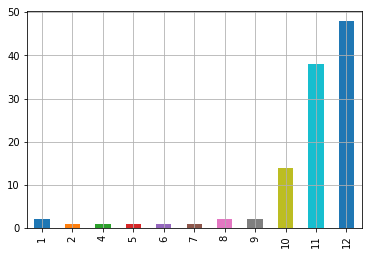

In [6]:
xmas_usa = release_dates[(release_dates.title.str.contains("Christmas")) & (release_dates.country == "USA")]
xmas_usa
xmas_usa['date'].dt.month.value_counts().sort_index().plot(kind='bar', grid=True)

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

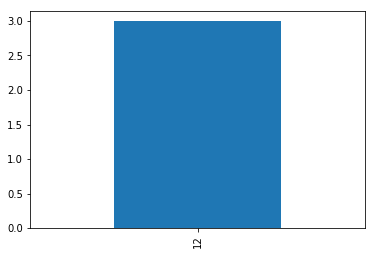

In [7]:
hobbit = release_dates[(release_dates.title.str.startswith("The Hobbit")) & (release_dates.country == "USA")]
hobbit['date'].dt.month.value_counts().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

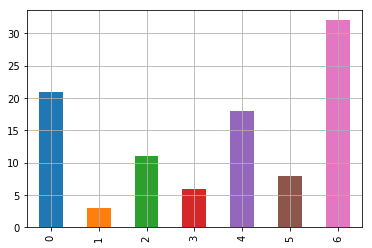

In [8]:
rom = release_dates[(release_dates.title.str.contains("Romance")) & (release_dates.country == "USA")]
rom['date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', grid=True)

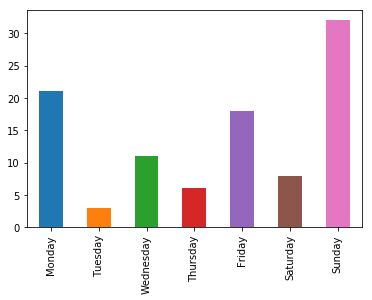

In [9]:
rom = release_dates[(release_dates.title.str.contains("Romance")) & (release_dates.country == "USA")]
rom1 = rom['date'].dt.dayofweek.value_counts().sort_index()
rom1.index = (['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
rom1.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

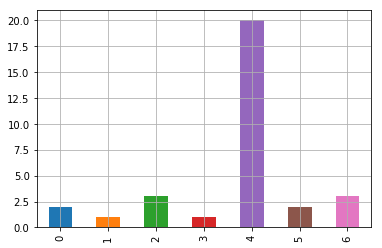

In [10]:
act = release_dates[(release_dates.title.str.contains("Action")) & (release_dates.country == "USA")]
act['date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', grid=True)

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [11]:
jd_90 = cast[(cast.name == "Judi Dench") & (cast.year // 10 * 10 == 1990)]
pd.merge(left=jd_90, right=release_dates[release_dates.country == "USA"]) #['date']

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

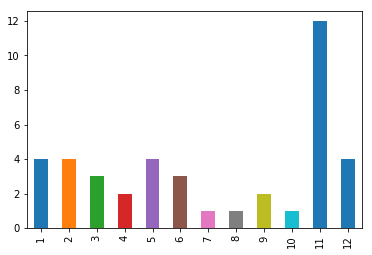

In [12]:
jd = cast[cast.name == "Judi Dench"]
jd_usa_release = pd.merge(left=jd, right=release_dates[release_dates.country == "USA"])

jd_usa_release['date'].dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

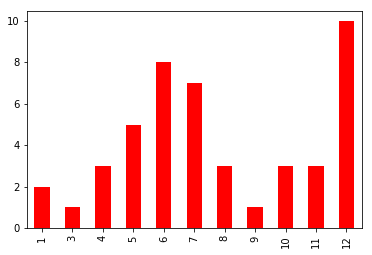

In [13]:
tc = cast[cast.name == "Tom Cruise"]
tc_usa_release = pd.merge(left=tc, right=release_dates[release_dates.country == "USA"])

tc_usa_release.date.dt.month.value_counts().sort_index().plot(kind='bar', color='red')